### Bayes's Theorem
- 경험에 의한 <b>확률의 업데이트</b>
- 사전 확률(given)에서 사건 발생을 통해 사후 확률로
- 빈도주의 vs 베이즈주의
- 객관적 확률은 존재하지 않는다!
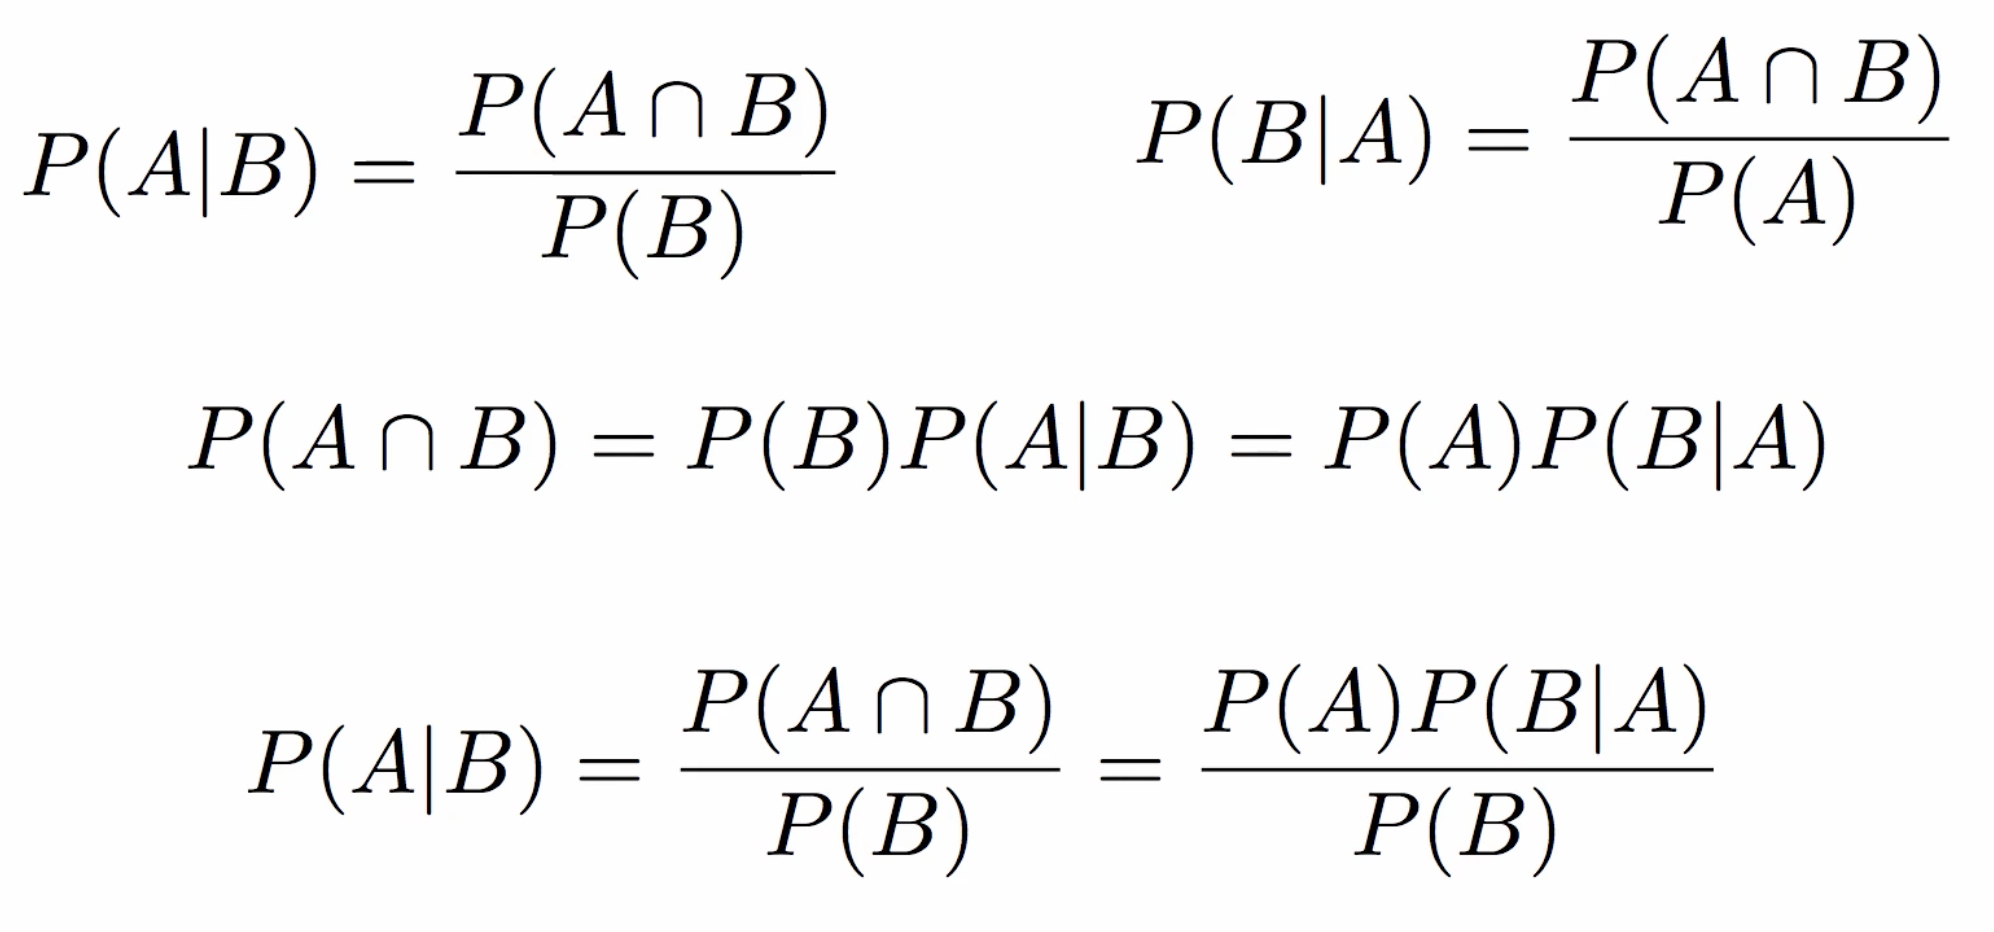
---
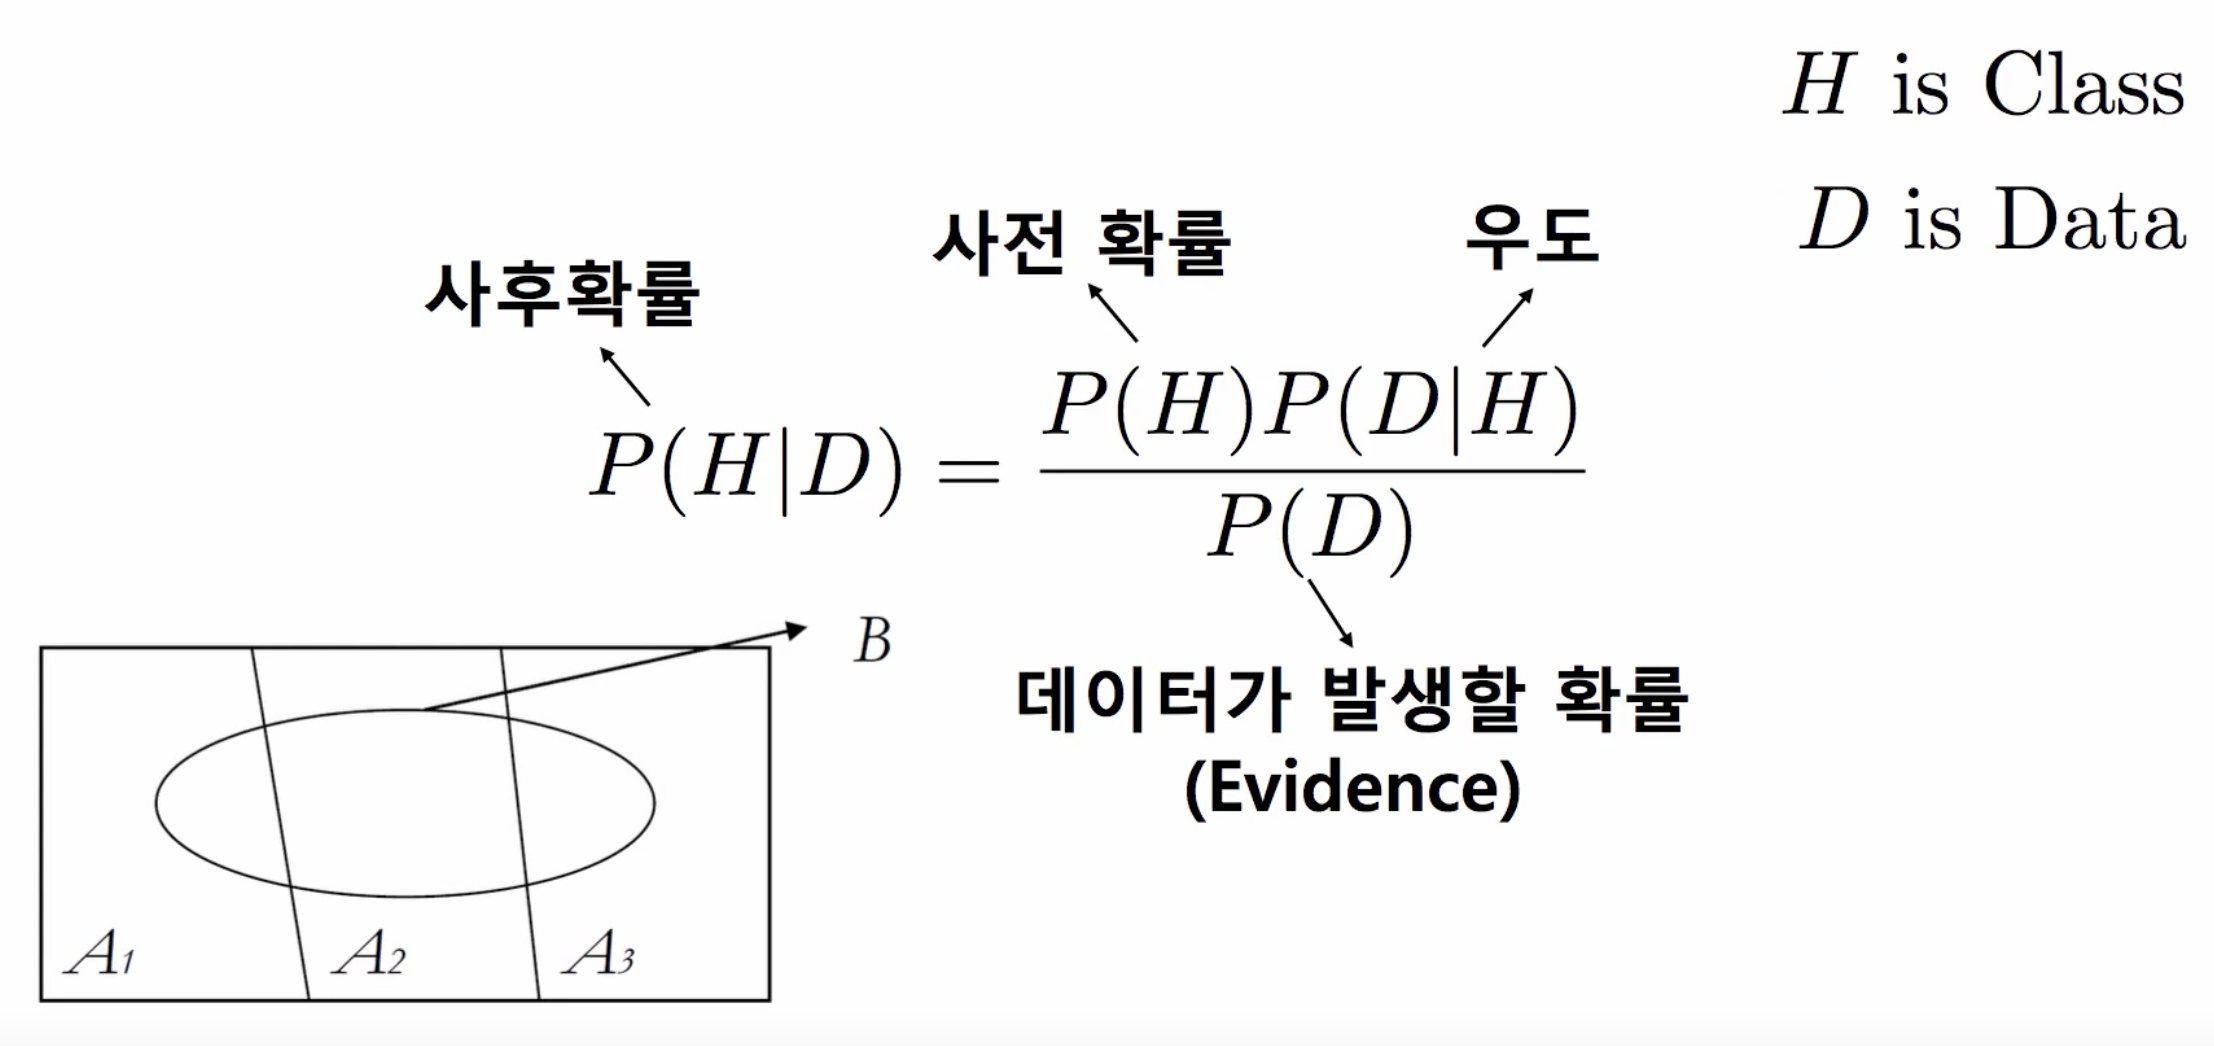
- <b>Bayes's Theorem에서 핵심은 데이터가 발생할 확률(X)로 사후확률(Class; Y)의 최대화를 구한다는 것!</b>

---

### Multinomial Naive Bayes
- X값이 Binary가 아니라 1 이상의 값을 가지는 문제
- 일반적으로 Text 문제를 분류할 때 많이 쓰임
- 단어의 존재 유무가 아닌 단어의 출현횟수를 Feature로
- Sparse Vector를 대상으로 할 때 Multinomial은 powerful함(L1, L2도 Sparse Vector에 robust함)

### Text의 Feature 표현(문자 → Feature)하는 방법

#### 1. (기본) 문자를 Vector로 바꾸는 One-Hot Encoding
- <b>하나의 단어</b>를 Vector의 Index로 인식, 단어 존재 시 1 없으면 0
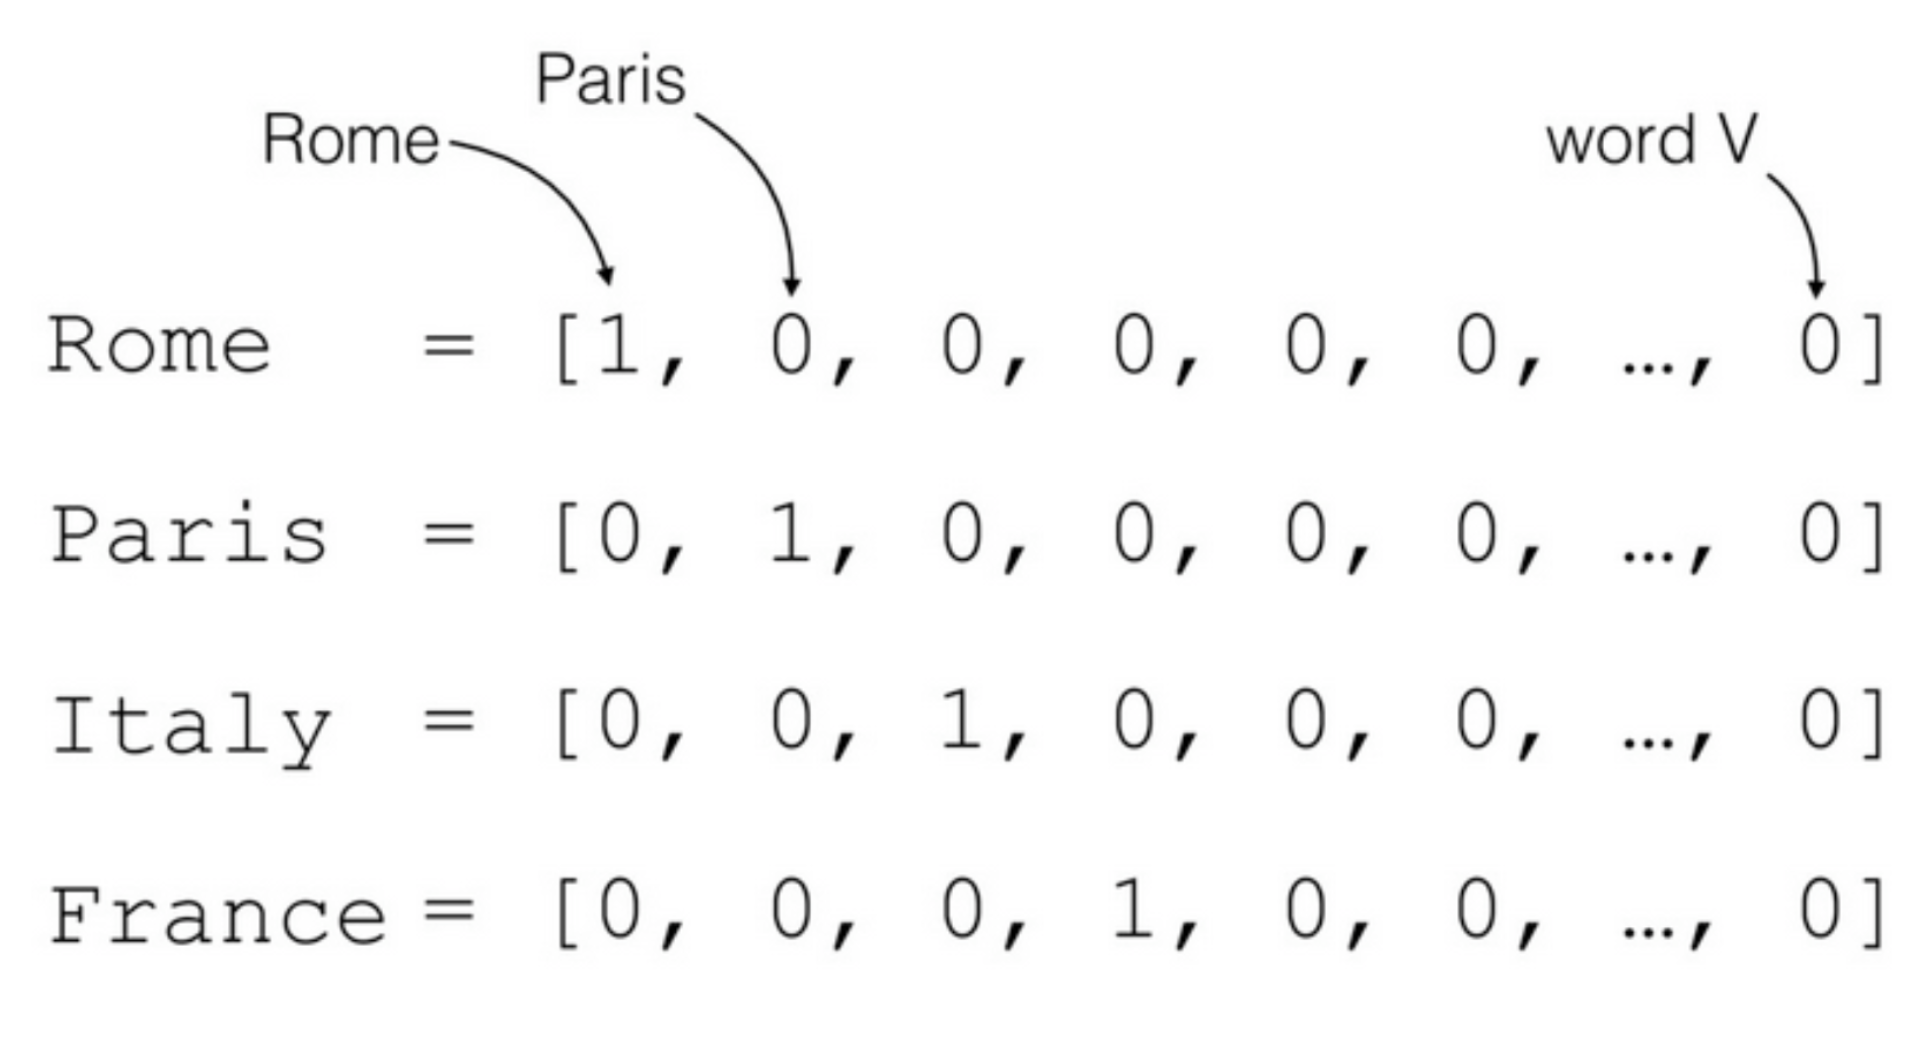

#### 2. Bag of words
- 단어별로 인덱스를 부여해서 <b>한 문장(또는 문서)</b>의 단어의 개수를 Vector로 표현
- '순서'의 정보는 잃게 되지만, 하나의 문장/문서를 Feature화하기 강력한 방법!
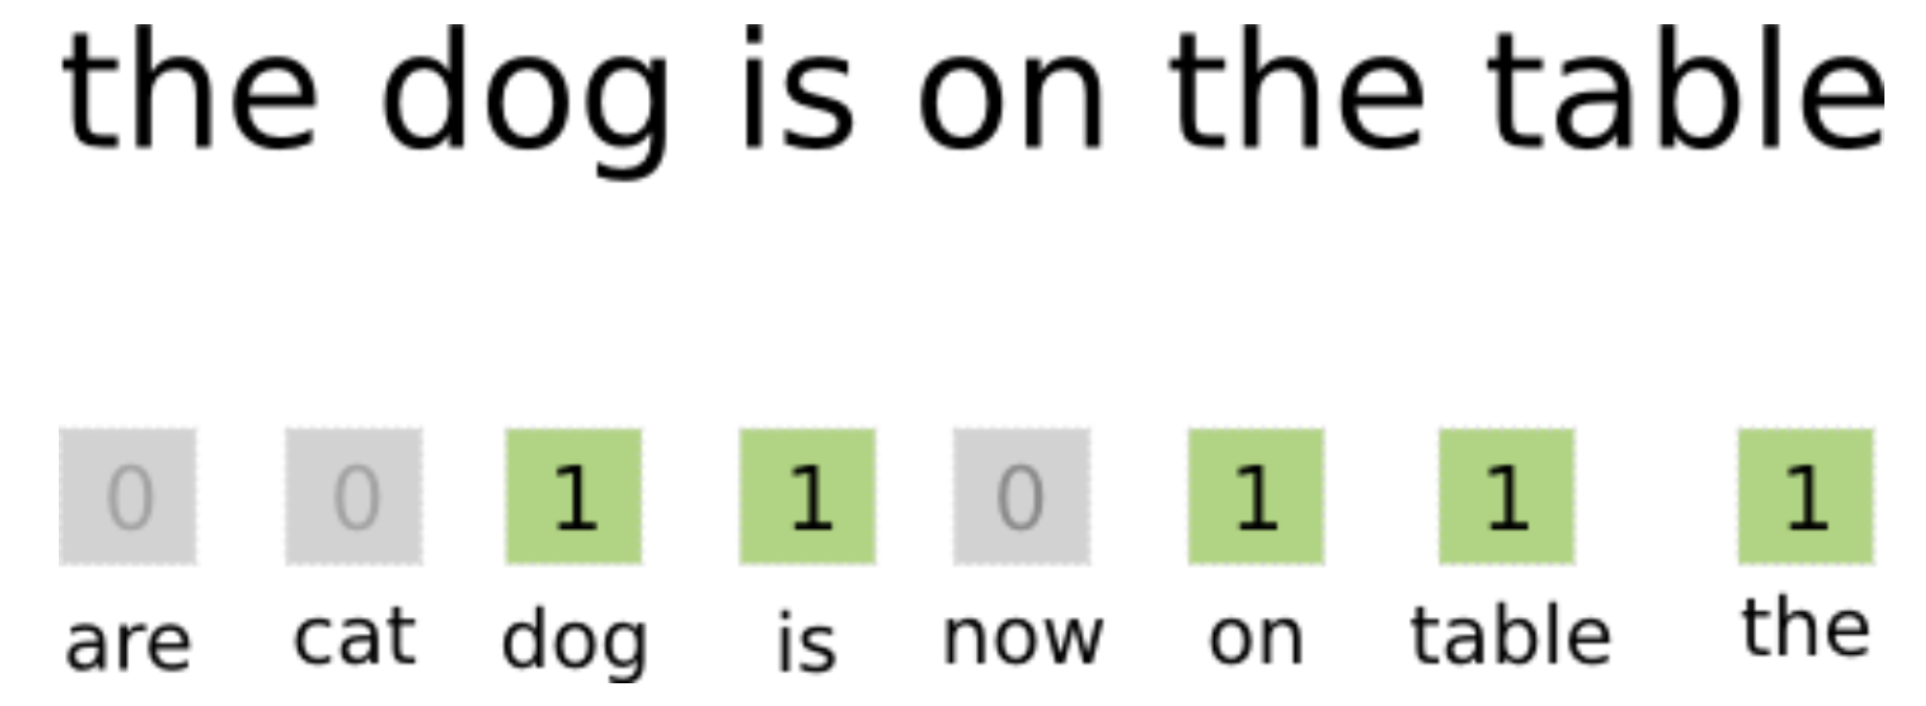

---
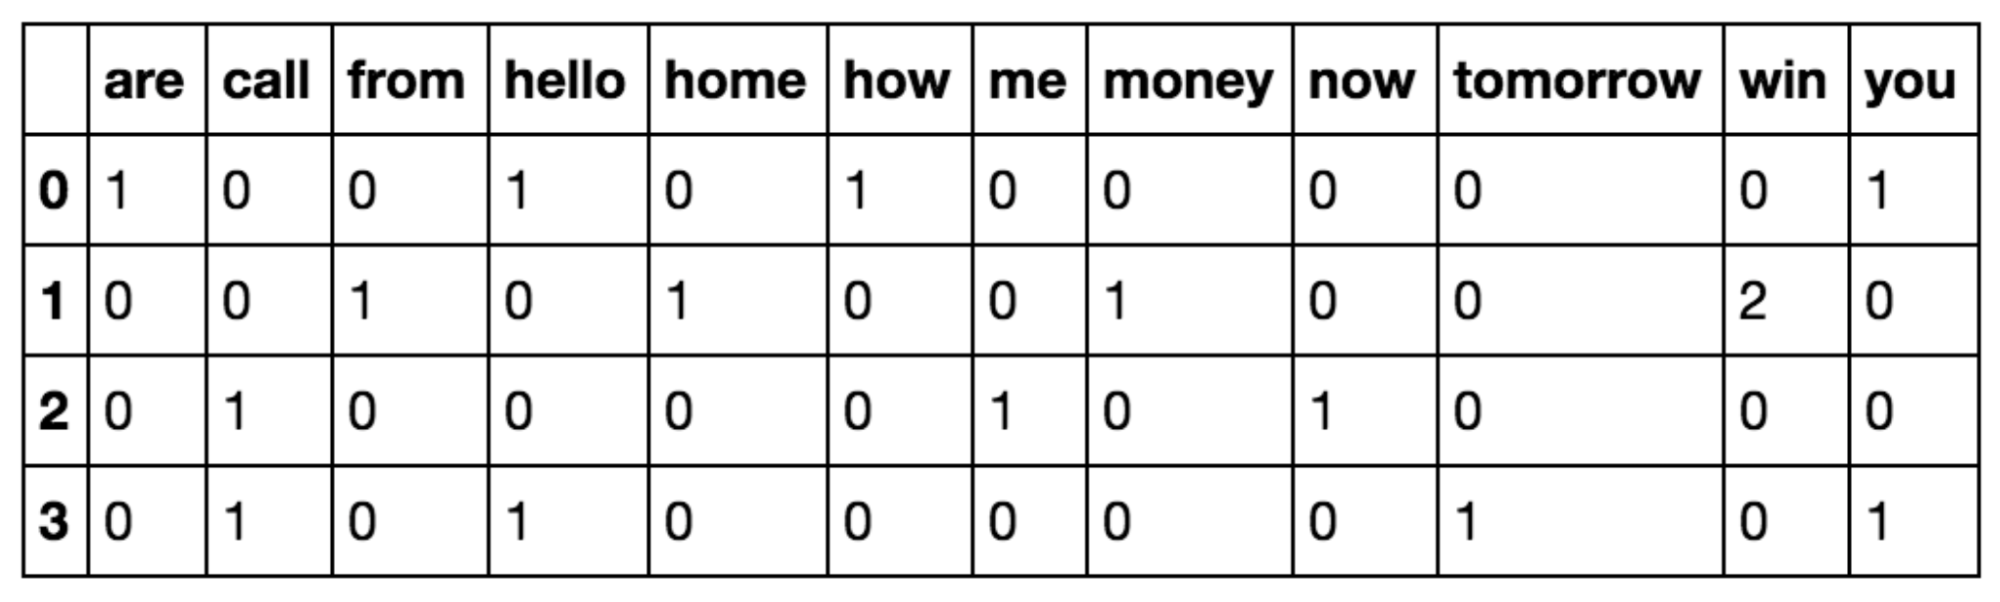

### ★★★ Naive Bayes의 기본식
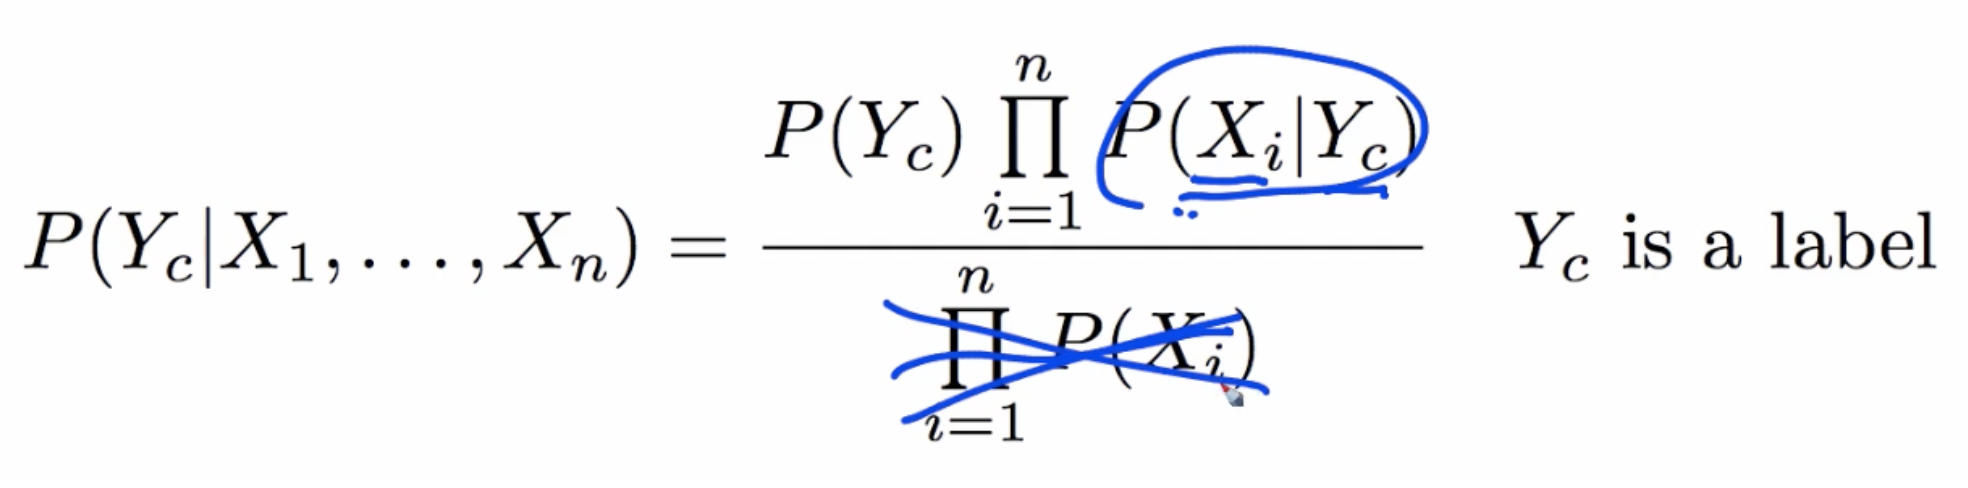
- <b>분자의 값이 0이 나올 수 있으므로 log를 취해 곱셈을 모두 덧셈으로 변환하여 계산</b>

---
- 식 계산하는 방식이 다름(from : https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)

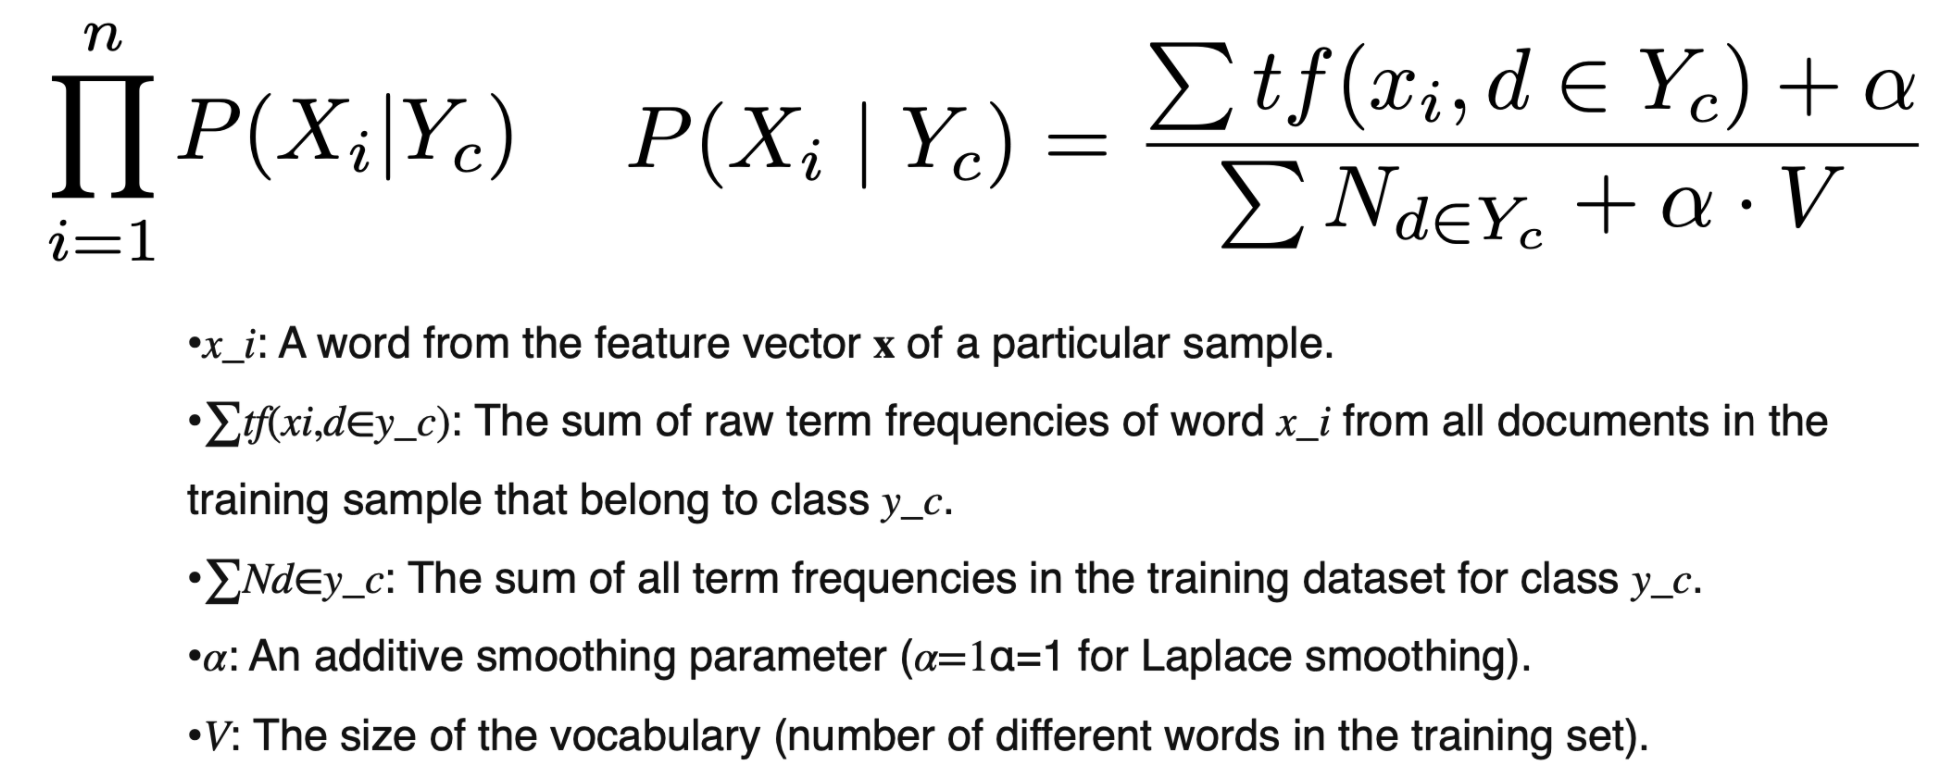
- (ex) 
    - 분자 : Y=1일 때, Y=0일 때 feature x의 값<b>(단어의 출현횟수)</b>
    - 분모 : Y=1일 때, Y=0일 때 feature의 전체 합<b>(단어의 전체 개수)</b>
- ⍺는 Laplace smoothing parameter로, 클수록 generalize해주는 효과(값들에 민감해지지 않도록 하는 효과 → underfitting 가능)
- V는 feature의 개수
---

### Gaussian Naive Bayes
- Category 데이터가 아닌 경우에 NB의 적용
- <b>Continuous 데이터의 적용</b>을 위해 y의 분포를 <b>정규분포(gaussian)</b>으로 가정함
- 확률 밀도 함수 상의 해당 값 x가 나올 확률로 NB를 구현함
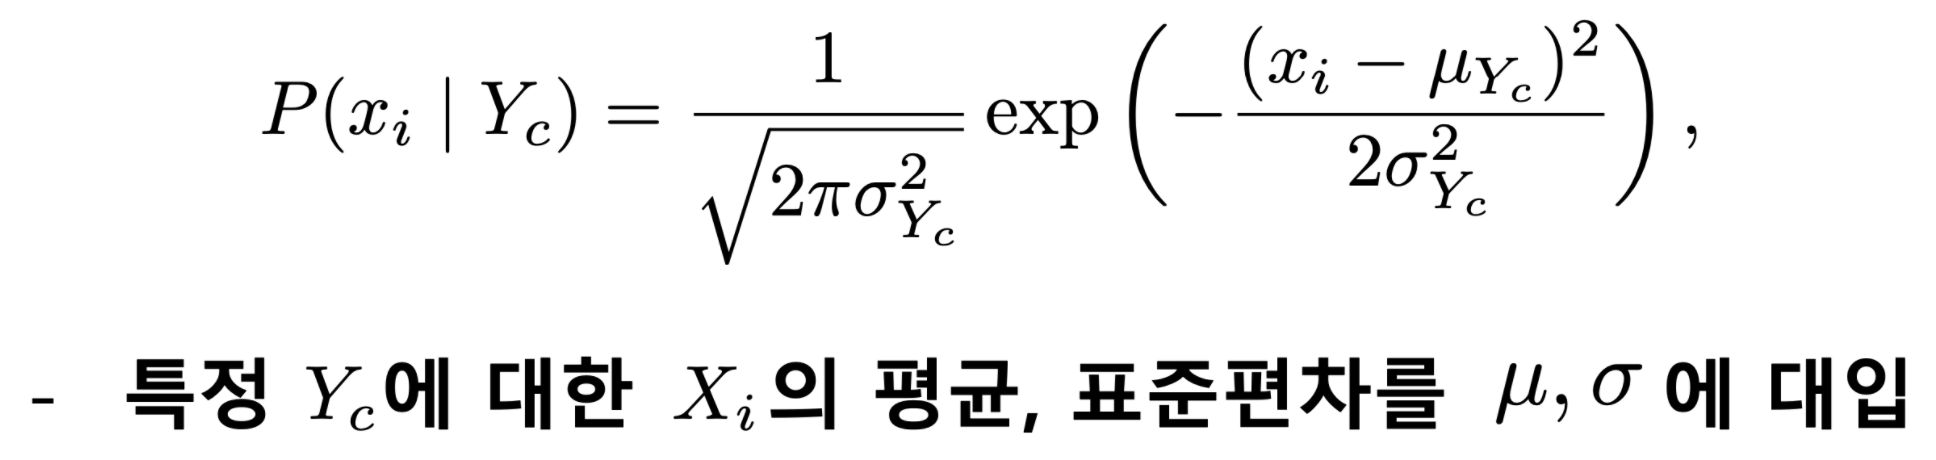
- (ex) Y=1일 때, Y=0일 때 feature x의 평균, 표준편차 값으로 계산
    - xi는 test data의 continuous value를 넣어줌
- (참고 : http://en.wikipedia.org/wiki/Naive_Bayes_classifier)

---

### CountVectorizer in Scikit-learn
- 문서에서 Bag of Words Vector를 뽑아주는 class
- 다른 전처리 모듈처럼 생성 → 적용의 과정을 거침
    - 선언
    - fit
    - transform

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

y_example_text = ["Sports", "Not sports", "Sports", "Sports", "Not sports"]
y_example = [1 if c == 'Sports' else 0 for c in y_example_text]
text_example = ["A great game game", "The The election was over",
                "Very clean game match", "A clean but forgettable game game","It was a close election"]

countvect_example = CountVectorizer()
X_example = countvect_example.fit_transform(text_example)
countvect_example.get_feature_names()[:8]

['but', 'clean', 'close', 'election', 'forgettable', 'game', 'great', 'it']

- X_example[0]을 보면 game이 2번, great이 1번 나온 것을 볼 수 있음
- 관사 'A'가 안 나온 이유는 stop_words로 자주 나오지만 의미가 없는 조사같은 걸 제외하기 때문임

In [2]:
X_example.toarray()

array([[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [3]:
y_example

[1, 0, 1, 1, 0]

### NB classifier family in scikit-learn
- Scikit-learn에서 제공하는 NB classifier

### (1) Bernoulli Naive Bayes
- alpha(default = 1.0) : Laplace smoothing parameter(클수록 generalized(underfitting), 작을수록 overfitting)
- binarize : Threshold for binarizing of sample features(어떤 값 threshold를 기준으로 binary화하는 것)
- fit_prior : Class별 P(Y<sub>c</sub>)의 확률을 정해주는 것(if false → uniform value(0.5, 0.5))

In [4]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(binarize = 0)  # 1개라도 출현하면 1, 아니면 0
clf.fit(X_example, y_example)
clf.class_log_prior_             # log(P(Y=0)), log(P(Y=1)) 확률값

array([-0.91629073, -0.51082562])

In [5]:
import numpy as np

np.log(2/5), np.log(3/5)

(-0.916290731874155, -0.5108256237659907)

In [6]:
clf.class_count_

array([2., 3.])

In [7]:
clf.feature_log_prob_    # Y=0일 때, Y=1일 때 feature x들의 확률값

array([[-1.38629436, -1.38629436, -0.69314718, -0.28768207, -1.38629436,
        -1.38629436, -1.38629436, -0.69314718, -1.38629436, -0.69314718,
        -0.69314718, -1.38629436, -0.28768207],
       [-0.91629073, -0.51082562, -1.60943791, -1.60943791, -0.91629073,
        -0.22314355, -0.91629073, -1.60943791, -0.91629073, -1.60943791,
        -1.60943791, -0.91629073, -1.60943791]])

In [8]:
clf.feature_count_

array([[0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 1., 0., 2.],
       [1., 2., 0., 0., 1., 3., 1., 0., 1., 0., 0., 1., 0.]])

### (2) Multinomial Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha = 1)
clf.fit(X_example, y_example)

MultinomialNB(alpha=1)

In [10]:
print(clf.class_log_prior_)
print(clf.feature_log_prob_)
print(clf.class_count_)
print(clf.feature_count_)

print(clf.coef_)
print(clf.intercept_)

[-0.91629073 -0.51082562]
[[-3.09104245 -3.09104245 -2.39789527 -1.99243016 -3.09104245 -3.09104245
  -3.09104245 -2.39789527 -3.09104245 -2.39789527 -1.99243016 -3.09104245
  -1.99243016]
 [-2.52572864 -2.12026354 -3.21887582 -3.21887582 -2.52572864 -1.42711636
  -2.52572864 -3.21887582 -2.52572864 -3.21887582 -3.21887582 -2.52572864
  -3.21887582]]
[2. 3.]
[[0. 0. 1. 2. 0. 0. 0. 1. 0. 1. 2. 0. 2.]
 [1. 2. 0. 0. 1. 5. 1. 0. 1. 0. 0. 1. 0.]]
[[-2.52572864 -2.12026354 -3.21887582 -3.21887582 -2.52572864 -1.42711636
  -2.52572864 -3.21887582 -2.52572864 -3.21887582 -3.21887582 -2.52572864
  -3.21887582]]
[-0.51082562]


### (3) Gaussian Naive Bayes
- X값을 toarray로 변경 후 넣는다는 차이점(Gaussian NB는 Sparse Vector 형태를 넣는 게 좋지 않음)
- Bernoulli Naive Bayes, Multinomial Naive Bayes는 Sparse Vector 형태에 강한 모델

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_example.toarray(), y_example)   

GaussianNB()

In [12]:
print(clf.class_count_)
print(clf.class_prior_)
print(clf.theta_)        # 각 feature x들의 평균
print(clf.sigma_)        # 각 feature x들의 분산

[2. 3.]
[0.4 0.6]
[[0.         0.         0.5        1.         0.         0.
  0.         0.5        0.         0.5        1.         0.
  1.        ]
 [0.33333333 0.66666667 0.         0.         0.33333333 1.66666667
  0.33333333 0.         0.33333333 0.         0.         0.33333333
  0.        ]]
[[8.00000000e-10 8.00000000e-10 2.50000001e-01 8.00000000e-10
  8.00000000e-10 8.00000000e-10 8.00000000e-10 2.50000001e-01
  8.00000000e-10 2.50000001e-01 1.00000000e+00 8.00000000e-10
  8.00000000e-10]
 [2.22222223e-01 2.22222223e-01 8.00000000e-10 8.00000000e-10
  2.22222223e-01 2.22222223e-01 2.22222223e-01 8.00000000e-10
  2.22222223e-01 8.00000000e-10 8.00000000e-10 2.22222223e-01
  8.00000000e-10]]
